# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

NumPy 1.21.5
Pandas 1.4.4
Matplotlib 3.5.2
Seaborn 0.11.2


In [3]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Pandas show all column
pd.set_option('display.max_columns', 50)

# Load Dataset

In [7]:
df_raw = pd.read_csv('online_shoppers_intention.csv')

In [8]:
df = df_raw.copy()

In [9]:
df.shape

(12330, 18)

# Exploratory Data Analysis

## Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Sampling untuk memahami data

In [11]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4985,3,47.0,0,0.0,66,2582.696970,0.003030,0.012121,11.969545,0.0,May,2,2,1,2,Returning_Visitor,False,False
2016,4,50.5,3,54.0,41,1490.552778,0.000000,0.006589,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
3693,0,0.0,0,0.0,3,6.000000,0.066667,0.133333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,False
10695,0,0.0,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Dec,1,1,2,1,Returning_Visitor,False,False
9257,4,56.5,2,8.0,9,198.250000,0.018182,0.036364,0.000000,0.0,Nov,1,8,3,6,Returning_Visitor,True,False
5137,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,5,13,Returning_Visitor,False,False
5275,7,215.2,0,0.0,119,4749.240385,0.015772,0.031812,1.164075,0.8,May,3,2,6,6,Returning_Visitor,False,False
3349,0,0.0,0,0.0,2,55.000000,0.000000,0.050000,0.000000,0.4,May,3,2,1,13,Returning_Visitor,False,False
10760,3,365.0,0,0.0,6,737.750000,0.000000,0.008333,0.000000,0.0,Nov,1,1,6,2,Returning_Visitor,False,False
11275,0,0.0,0,0.0,5,185.000000,0.000000,0.040000,0.000000,0.0,Nov,3,2,7,6,New_Visitor,True,False


### Ubah tipe data

In [12]:
df['OperatingSystems']=df['OperatingSystems'].astype('object')
df['Browser']=df['Browser'].astype('object')
df['Region']=df['Region'].astype('object')
df['TrafficType']=df['TrafficType'].astype('object')
df['Weekend']=df['Weekend'].astype('int64')

In [13]:
df['Weekend']=df['Weekend'].astype('object')
df['Revenue']=df['Revenue'].astype('int64')

### Pengelompokan kolom berdasarkan jenisnya

In [14]:
# Pengelompokan kolom berdasarkan jenisnya
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object' and i != 'Revenue']

## Statistical summary

In [15]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [16]:
df[cats].describe().T

,count,unique,top,freq
Month,12330,10,May,3364
OperatingSystems,12330,8,2,6601
Browser,12330,13,2,7961
Region,12330,9,1,4780
TrafficType,12330,20,2,3913
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,0,9462


In [17]:
# Count values
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

### Feature Target

In [18]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [19]:
df['Revenue'].value_counts(normalize=True)

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Revenue')

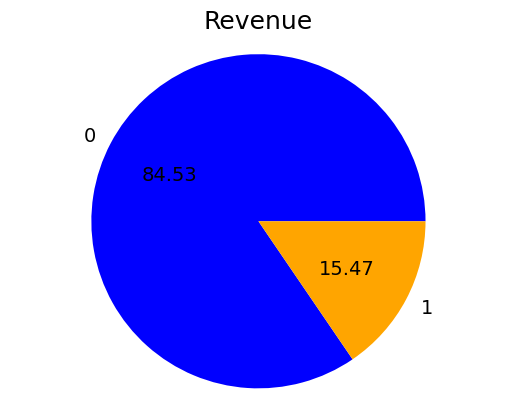

In [20]:
value_counts = df['Revenue'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[0], value_counts[1]], labels=['0', '1'], 
       colors=['blue', 'orange'], textprops={'color':'black', 'fontsize':14}, autopct='%.2f')
ax.axis('equal')
ax.set_title('Revenue', fontsize=18)

## Univariate Analysis

### Boxplot

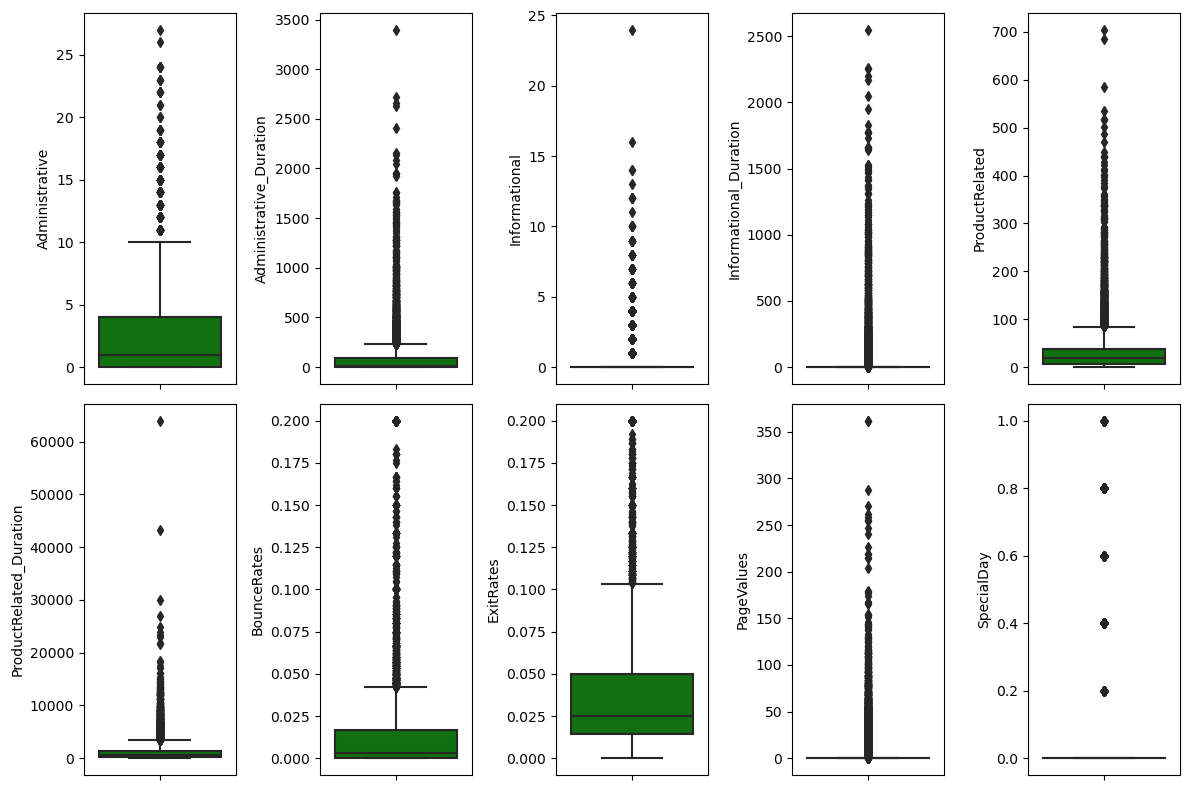

In [21]:
# Pengecekan distribusi dari fitur numerical menggunakan boxplot
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Histogram

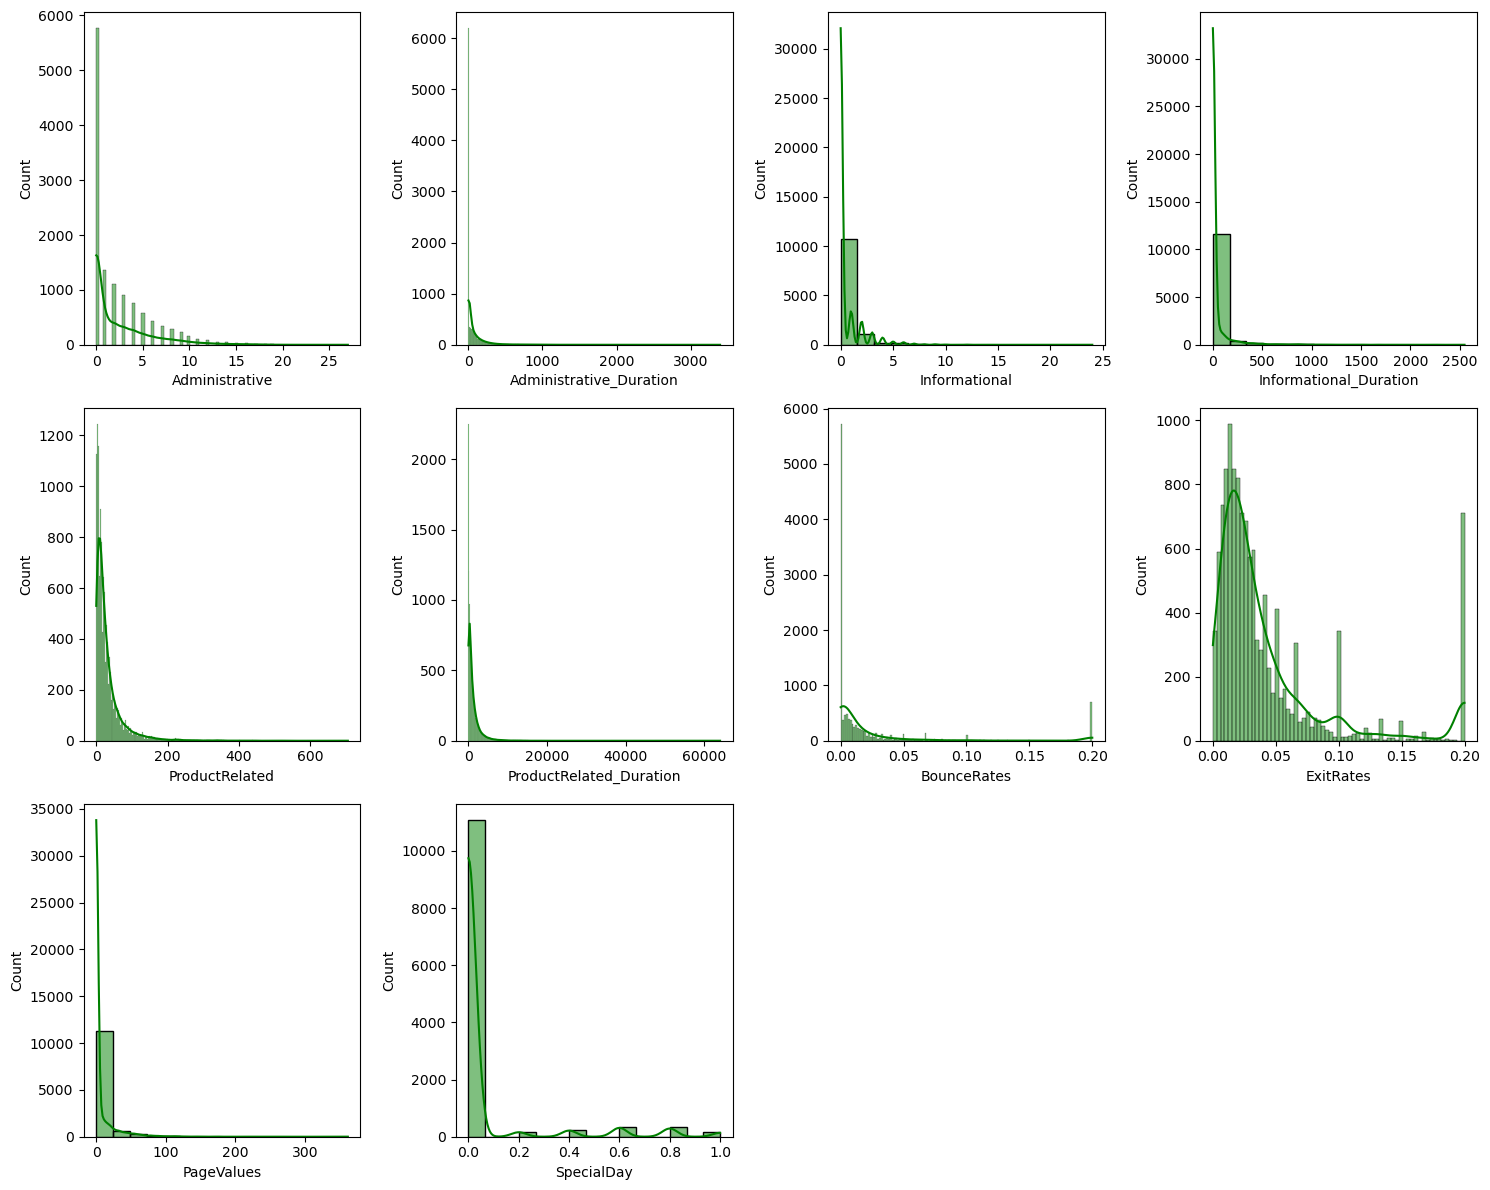

In [22]:
# Pengecekan distribusi dari fitur numerical dengan menggunakan histplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

### Countplot (categorical)

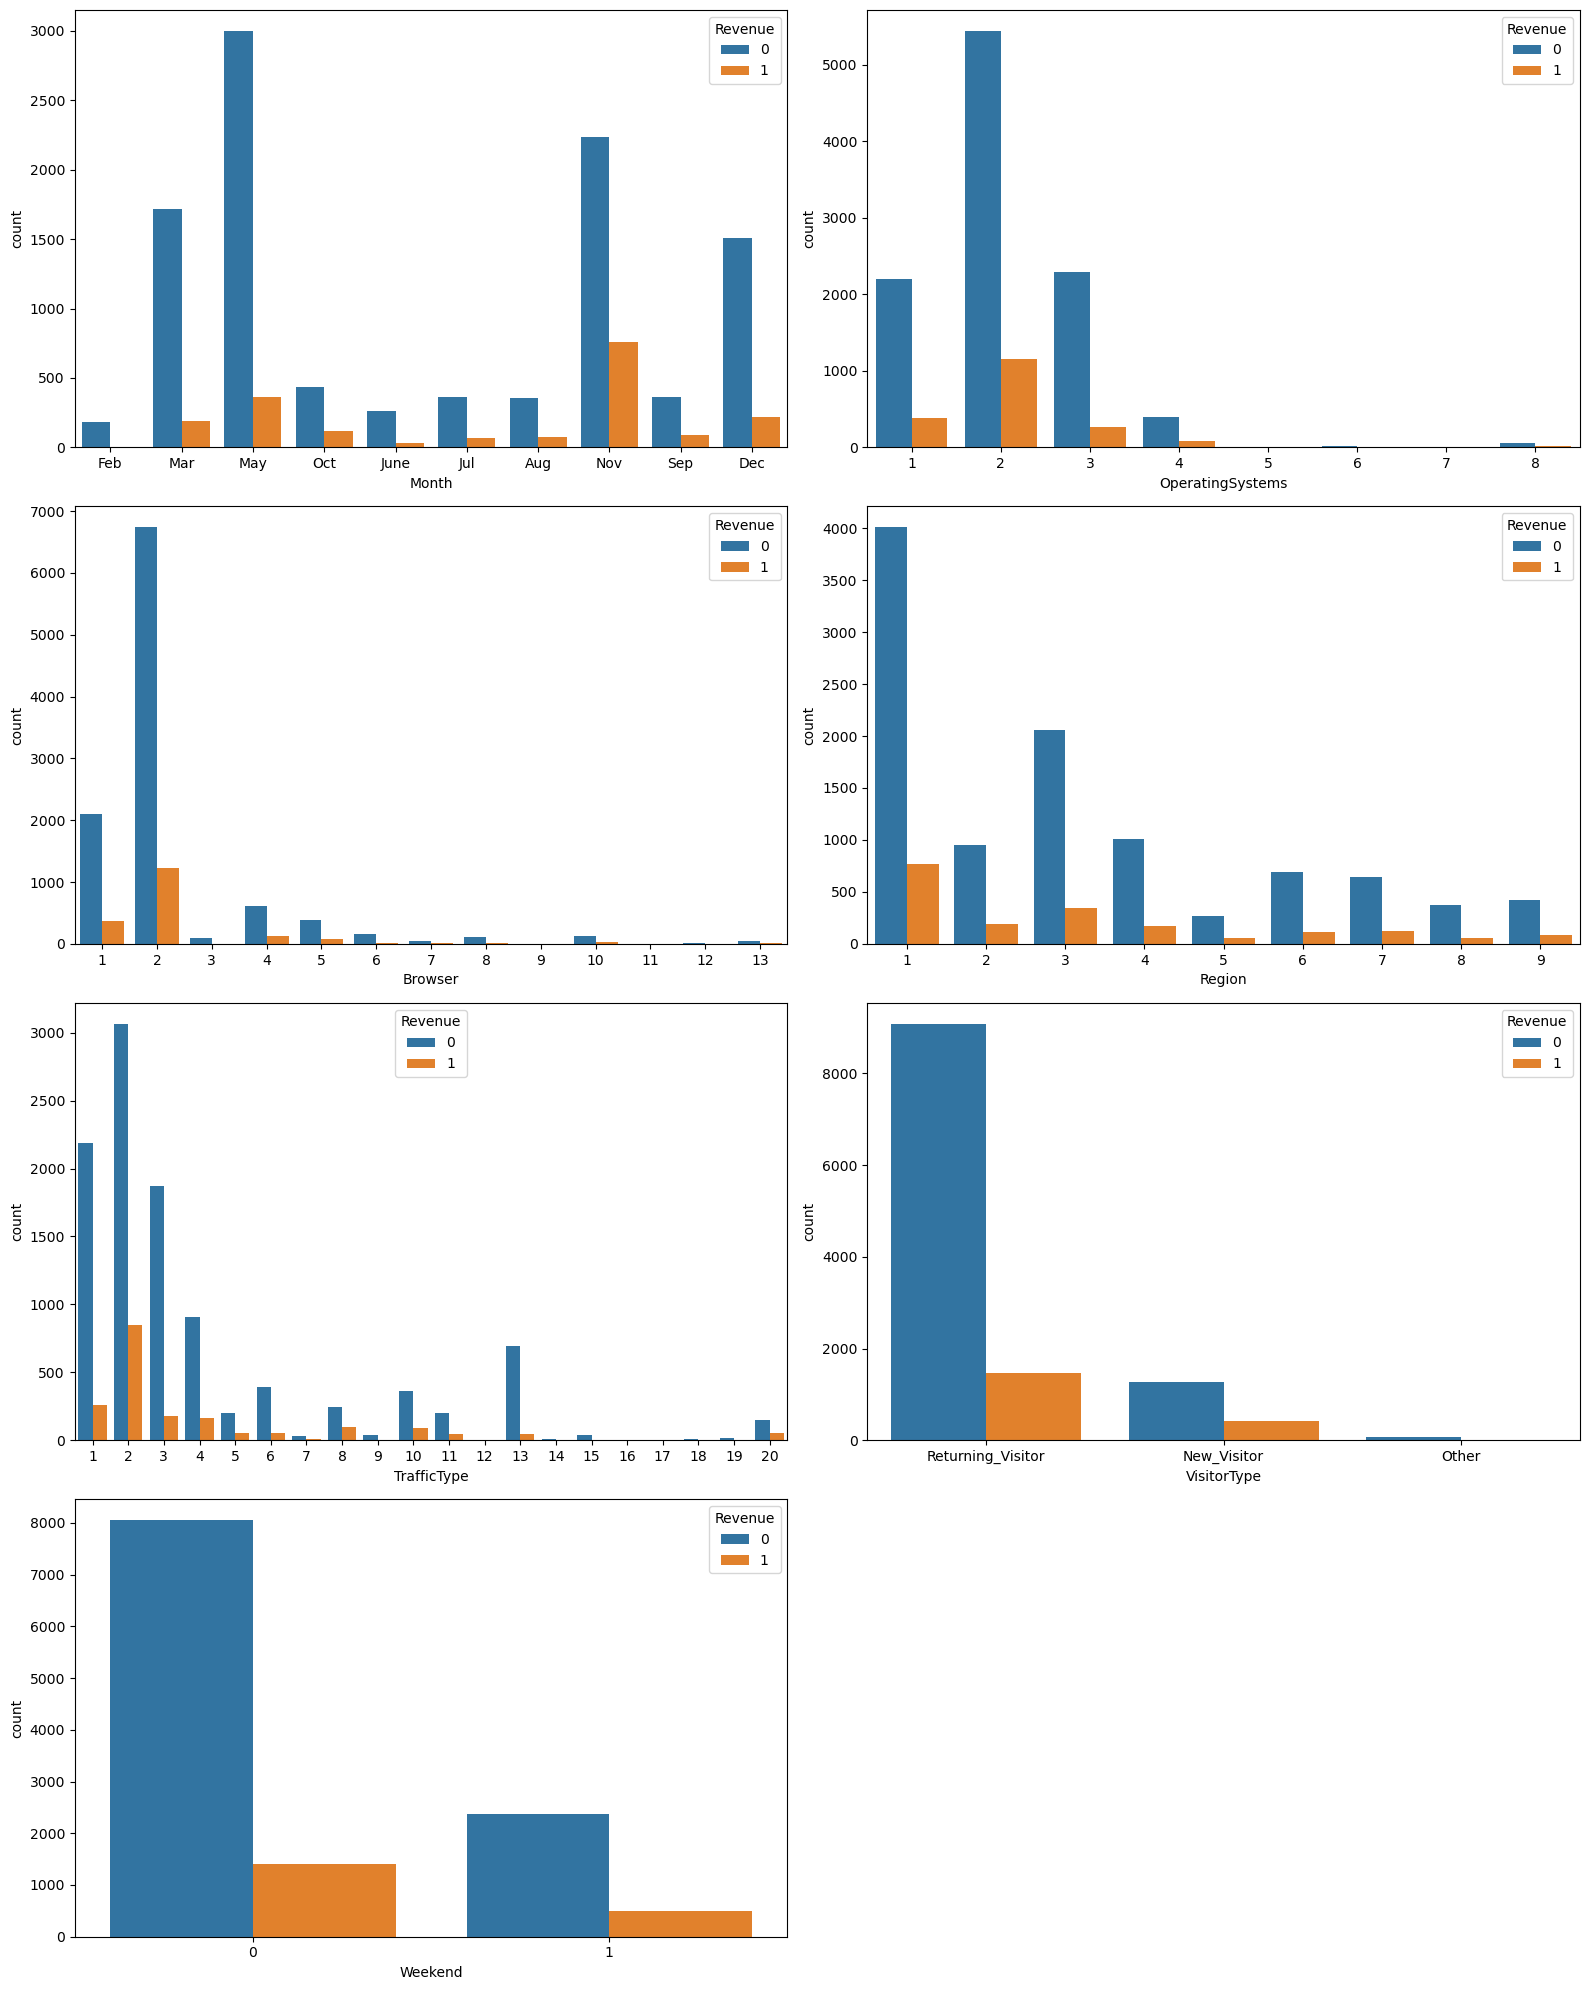

In [23]:
# Pengecekan distribusi dari fitur categorical menggunakan countplot
plt.figure(figsize=(16, 20))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[cats[i]], hue=df['Revenue'], orient='h')
    plt.tight_layout()

## Multivariate Analysis

### Correlation Heatmap

<AxesSubplot:>

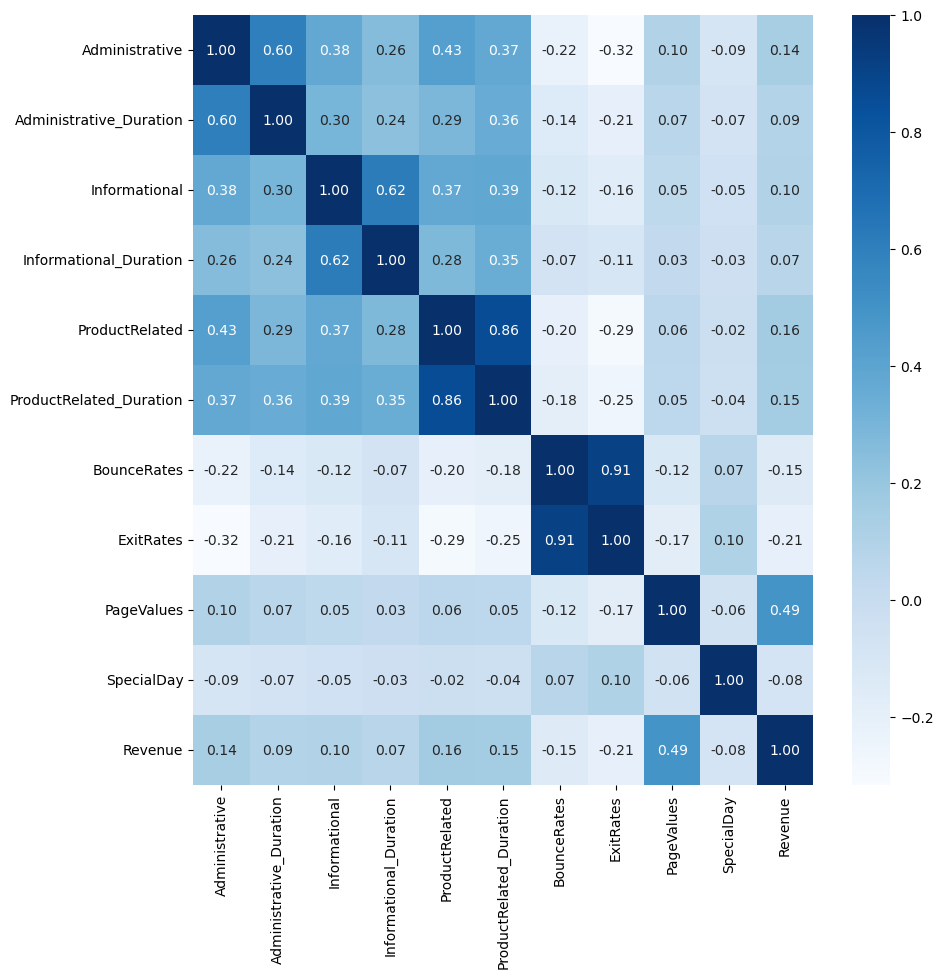

In [24]:
# Pengecekan korelasi antar feature dengan Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Category Plot

#### Untuk melihat korelasi data numerik terhadap feature `Revenue`

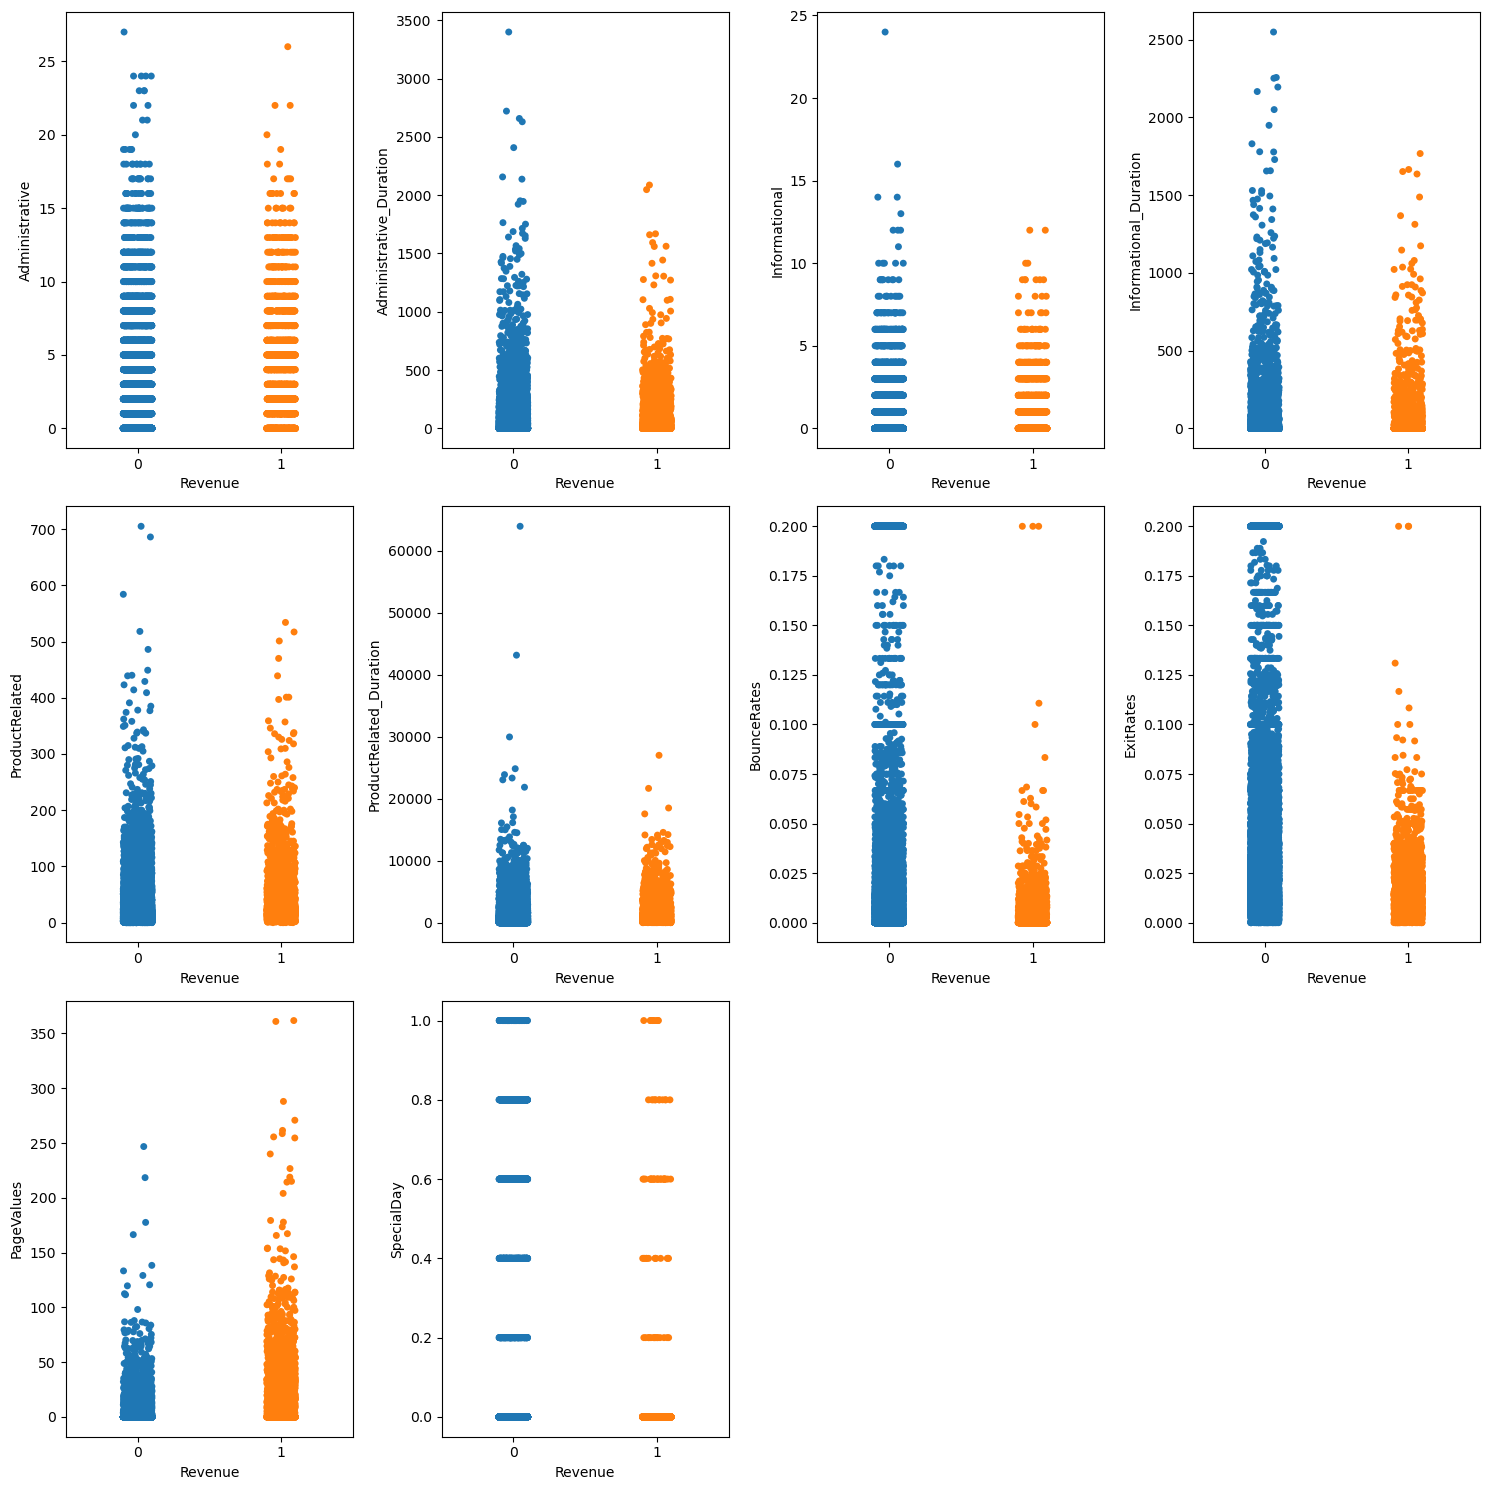

In [25]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Revenue', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

#### Untuk melihat korelasi feature `BounceRates`, `ExitRates`, `PageValues`  terhadap feature `Revenue`

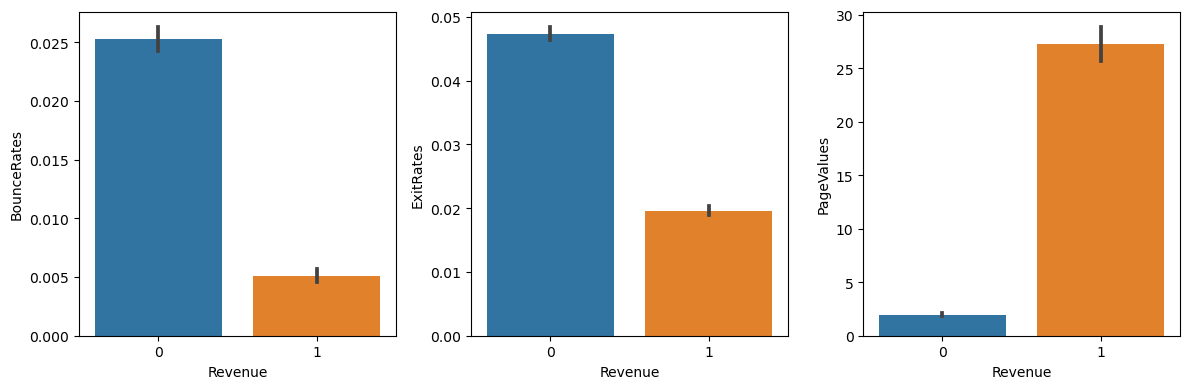

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.barplot(x='Revenue', y='BounceRates', data=df, ax=axes[0])
sns.barplot(x='Revenue', y='ExitRates', data=df, ax=axes[1])
sns.barplot(x='Revenue', y='PageValues', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

# Data Cleaning

### Missing Value

In [27]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Duplicate Data

In [28]:
# Cek duplikat
df.duplicated().sum()

125

### Drop Nilai Other pada kolom `VisitorType`

In [29]:
other_val = df[df['VisitorType']=='Other'].index
df = df.drop(other_val, axis=0).reset_index(drop=True)

In [30]:
print('Jumlah data setelah remove nilai Other:', len(df))

Jumlah data setelah remove nilai Other: 12245


In [31]:
df_clean = df.copy()

### Handle Outliers

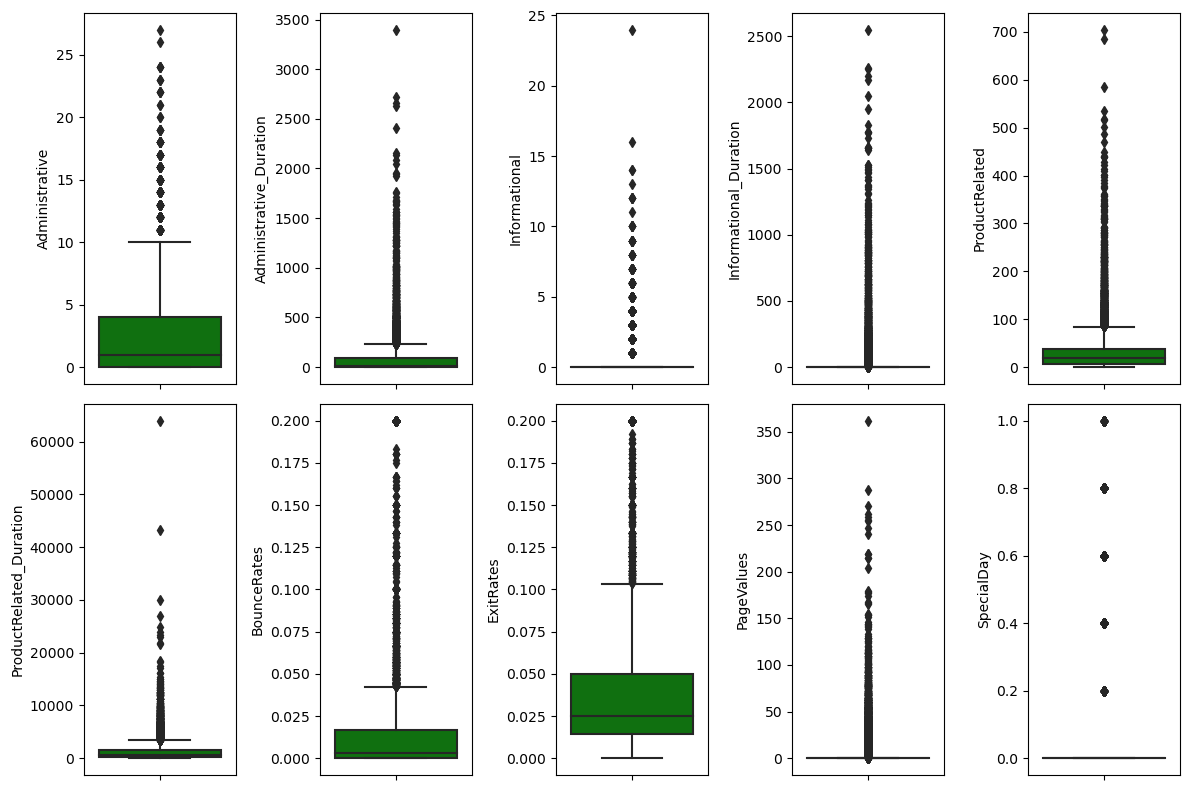

In [32]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Log Transformation

In [33]:
feature_log = ['Administrative', 'Informational', 'ProductRelated']

for i in feature_log:
    df_clean[i] = df_clean[i].apply(lambda x: np.log(x) if x != 0 else 0)

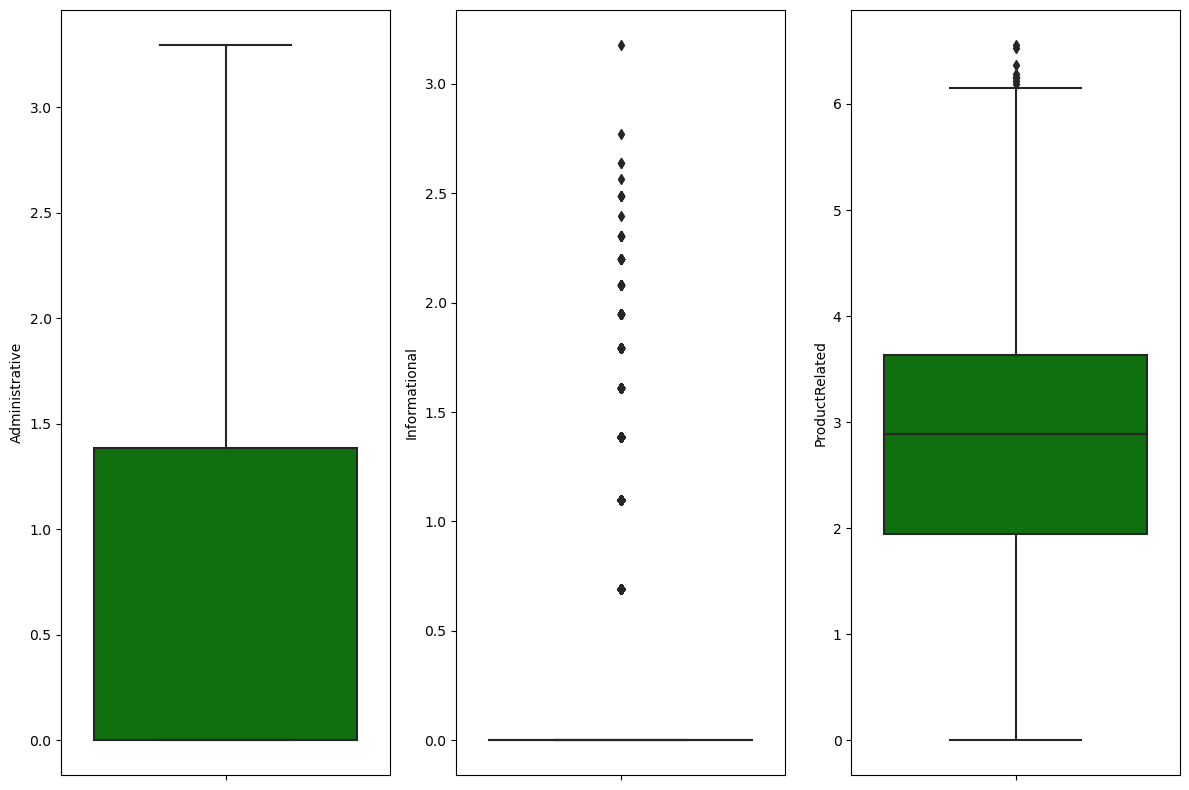

In [34]:
plt.figure(figsize=(12,8))
for i in range(0, len(feature_log)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_clean[feature_log[i]], color='green', orient='v')
    plt.tight_layout()

### Z-Score

In [35]:
df_zscore=df_clean.copy()

In [36]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
            'ExitRates', 'PageValues', 'SpecialDay']:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_zscore = df_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

df_zscore = df_zscore.reset_index(drop = True)

Jumlah baris sebelum memfilter outlier: 12245
Jumlah baris setelah memfilter outlier: 10239


**Data Setelah dilakukan handling outlier**

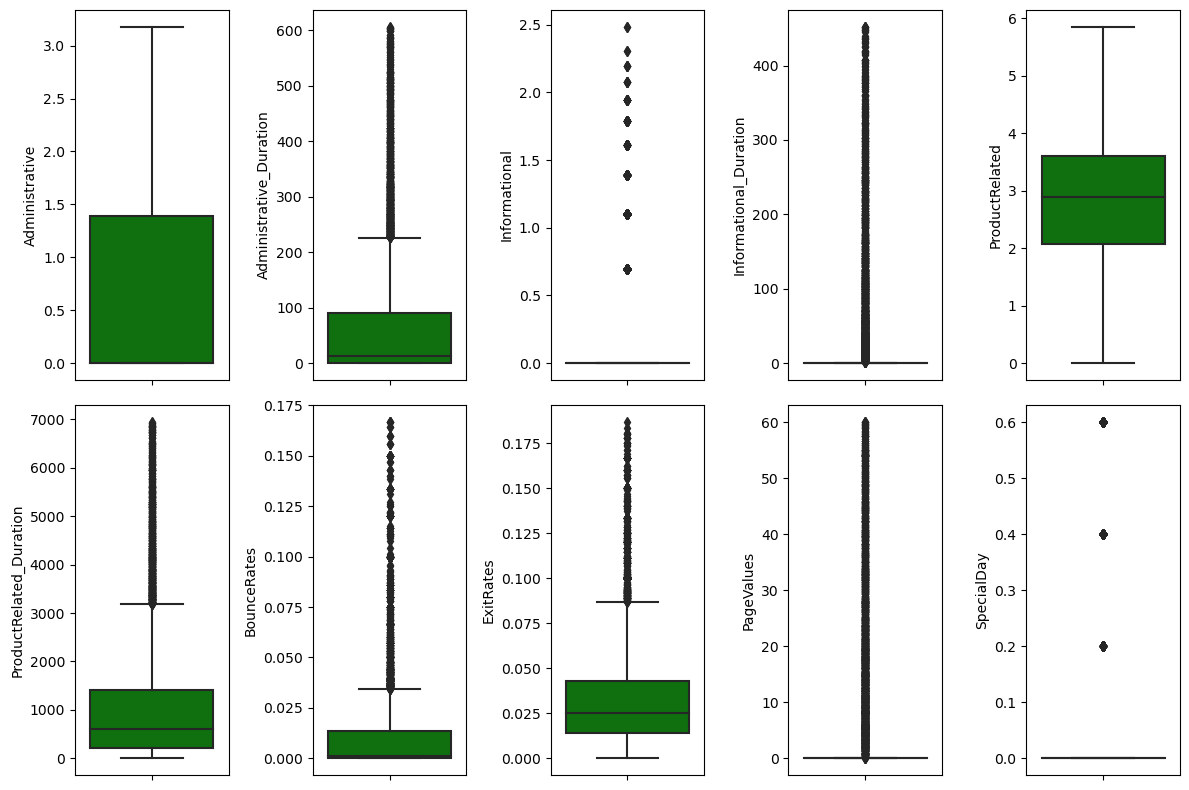

In [37]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df_zscore[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Feature Selection

In [38]:
df_fs = df_zscore.copy()

In [39]:
df_fs = df_fs[['Administrative', 'Administrative_Duration', 'Informational' ,'Informational_Duration',
               'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'VisitorType', 'Weekend', 'Revenue']]

### Feature Transformation

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_fs['Administrative_std'] = StandardScaler().fit_transform(df_fs['Administrative'].values.reshape(len(df_fs),1))
df_fs['Administrative_Duration_std'] = StandardScaler().fit_transform(df_fs['Administrative_Duration'].values.reshape(len(df_fs),1))
df_fs['Informational_std'] = StandardScaler().fit_transform(df_fs['Informational'].values.reshape(len(df_fs),1))
df_fs['Informational_Duration_std'] = StandardScaler().fit_transform(df_fs['Informational_Duration'].values.reshape(len(df_fs),1))
df_fs['ProductRelated_std'] = StandardScaler().fit_transform(df_fs['ProductRelated'].values.reshape(len(df_fs),1))
df_fs['ExitRates_std'] = StandardScaler().fit_transform(df_fs['ExitRates'].values.reshape(len(df_fs),1))
df_fs['PageValues_std'] = StandardScaler().fit_transform(df_fs['PageValues'].values.reshape(len(df_fs),1))
df_fs['SpecialDay_std'] = StandardScaler().fit_transform(df_fs['SpecialDay'].values.reshape(len(df_fs),1))

In [41]:
df_std = df_fs.drop(['Administrative', 'Administrative_Duration', 'Informational' ,'Informational_Duration',
                     'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay'], axis=1)

In [42]:
df_std.head()

,Month,VisitorType,Weekend,Revenue,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ExitRates_std,PageValues_std,SpecialDay_std
0,Feb,Returning_Visitor,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-2.027737,2.207171,-0.381875,-0.253362
1,Feb,Returning_Visitor,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-2.027737,3.541933,-0.381875,-0.253362
2,Feb,Returning_Visitor,1,0,-0.774098,-0.624425,-0.334817,-0.312483,-0.514734,0.538718,-0.381875,-0.253362
3,Feb,Returning_Visitor,0,0,-0.774098,-0.624425,-0.334817,-0.312483,0.088661,-0.310144,-0.381875,-0.253362
4,Feb,Returning_Visitor,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-1.646567,-0.388200,-0.381875,3.087498


### Feature Encoding

**Label encoding feature `Month`**

In [43]:
df_encode = df_std.copy()

In [44]:
df_encode['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [45]:
mapping_month = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
df_encode['Month'] = df_encode['Month'].map(mapping_month)

**Label encoding feature `VisitorType`**

In [46]:
df_encode['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [47]:
mapping_visitortype = {'New_Visitor':0, 'Returning_Visitor':1}
df_encode['VisitorType'] = df_encode['VisitorType'].map(mapping_visitortype)

In [48]:
df_encode.head()

,Month,VisitorType,Weekend,Revenue,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ExitRates_std,PageValues_std,SpecialDay_std
0,2,1,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-2.027737,2.207171,-0.381875,-0.253362
1,2,1,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-2.027737,3.541933,-0.381875,-0.253362
2,2,1,1,0,-0.774098,-0.624425,-0.334817,-0.312483,-0.514734,0.538718,-0.381875,-0.253362
3,2,1,0,0,-0.774098,-0.624425,-0.334817,-0.312483,0.088661,-0.310144,-0.381875,-0.253362
4,2,1,0,0,-0.774098,-0.624425,-0.334817,-0.312483,-1.646567,-0.388200,-0.381875,3.087498


### Imbalance Class

In [49]:
df_encode.Revenue.value_counts()

0    8742
1    1497
Name: Revenue, dtype: int64

In [50]:
df_encode.Revenue.value_counts(normalize=True)

0    0.853794
1    0.146206
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Revenue')

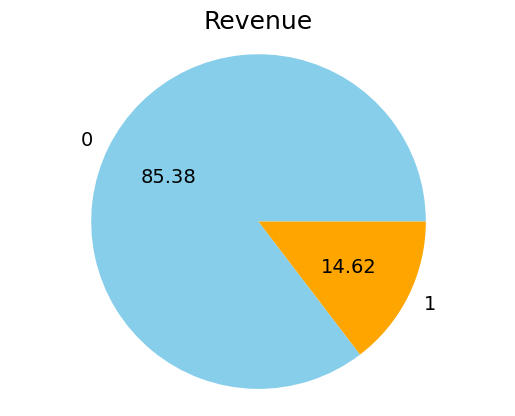

In [51]:
value_counts = df_encode['Revenue'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[0], value_counts[1]], labels=['0', '1'], 
       colors=['skyblue', 'orange'], textprops={'color':'black', 'fontsize':14}, autopct='%.2f')
ax.axis('equal')
ax.set_title('Revenue', fontsize=18)

## Split Data

In [52]:
X = df_encode.drop('Revenue', axis = 1)
y = df_encode['Revenue'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        10239 non-null  int64  
 1   VisitorType                  10239 non-null  int64  
 2   Weekend                      10239 non-null  object 
 3   Administrative_std           10239 non-null  float64
 4   Administrative_Duration_std  10239 non-null  float64
 5   Informational_std            10239 non-null  float64
 6   Informational_Duration_std   10239 non-null  float64
 7   ProductRelated_std           10239 non-null  float64
 8   ExitRates_std                10239 non-null  float64
 9   PageValues_std               10239 non-null  float64
 10  SpecialDay_std               10239 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 880.0+ KB


In [58]:
from imblearn import over_sampling
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [59]:
print(pd.Series(y_train_SMOTE).value_counts())

1    6106
0    6106
dtype: int64


# Modeling

## Function Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

lr = LogisticRegression() # inisiasi object dengan nama lr
lr.fit(X_train_SMOTE, y_train_SMOTE) # fit model dari data train
eval_classification(lr)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.49
Recall (Test Set): 0.72
F1-Score (Test Set): 0.59
AUC (test-proba): 0.88
AUC (train-proba): 0.90
roc_auc (crossval train): 0.8818396466185826
roc_auc (crossval test): 0.8670621428780247


#### Tuning Hyperparameter

In [62]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
lr_tuning = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
lr_tuning.fit(X_train_SMOTE, y_train_SMOTE)
eval_classification(lr_tuning)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.49
Recall (Test Set): 0.72
F1-Score (Test Set): 0.59
AUC (test-proba): 0.88
AUC (train-proba): 0.90
roc_auc (crossval train): 0.8613003639320407
roc_auc (crossval test): 0.8649566646407582


#### Analyzing Learning Curve

In [63]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train_SMOTE, y_train_SMOTE)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train_SMOTE)
        train_auc = roc_auc_score(y_train_SMOTE, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Logistic Regression')
    plt.legend()
    plt.show()

#### Learning Curve

param value: 0.0001; train: 0.8559892172449838; test: 0.8484559243223677
param value: 0.0006040404040404041; train: 0.8809066090722382; test: 0.8693556751263382
param value: 0.0011080808080808082; train: 0.8852599329092571; test: 0.8727882112179977
param value: 0.0016121212121212123; train: 0.8874880925035584; test: 0.8742821692583982
param value: 0.002116161616161616; train: 0.8888854497501236; test: 0.8752810416115605
param value: 0.0026202020202020205; train: 0.8898631277606912; test: 0.875968418927761
param value: 0.0031242424242424243; train: 0.8906081811138926; test: 0.8764408820704153
param value: 0.003628282828282828; train: 0.8912020941529861; test: 0.8767741295540923
param value: 0.004132323232323233; train: 0.8916706961809862; test: 0.8771021564505574
param value: 0.004636363636363637; train: 0.892062990455013; test: 0.8773257716027899
param value: 0.0051404040404040416; train: 0.8923927365103179; test: 0.8775093622530661
param value: 0.005644444444444445; train: 0.892662348

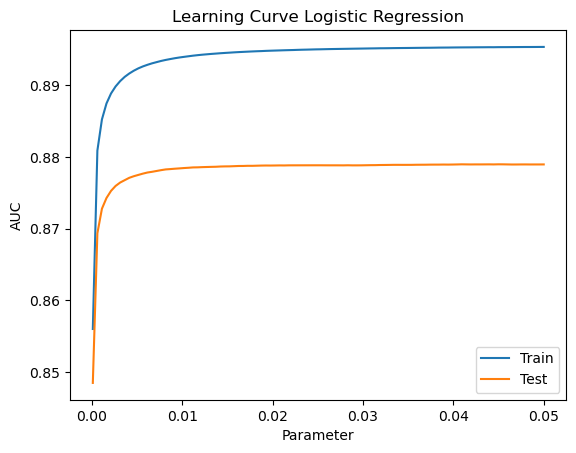

In [64]:
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train_SMOTE,y_train_SMOTE) # fit model dari data train
eval_classification(dt)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.64
F1-Score (Test Set): 0.55
AUC (test-proba): 0.76
AUC (train-proba): 1.00
roc_auc (crossval train): 0.9999839057010419
roc_auc (crossval test): 0.7067893942174761


#### Tuning Hyperparameter

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter
                      )

dt = DecisionTreeClassifier(random_state=42)
dt_tuning = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', cv=5)
dt_tuning.fit(X_train_SMOTE, y_train_SMOTE)
eval_classification(dt_tuning)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.46
Recall (Test Set): 0.74
F1-Score (Test Set): 0.57
AUC (test-proba): 0.89
AUC (train-proba): 0.96
roc_auc (crossval train): 0.9350617624513594
roc_auc (crossval test): 0.8678804333582855


#### Analyzing Learning Curve

In [67]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_train_SMOTE, y_train_SMOTE)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train_SMOTE)
        train_auc = roc_auc_score(y_train_SMOTE, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Decision Tree')
    plt.legend()
    plt.show()

#### Learning Curve

param value: 1; train: 0.9999983906976315; test: 0.7538980384513649
param value: 2; train: 0.9989432381888739; test: 0.7702963379320906
param value: 3; train: 0.9972904712455753; test: 0.7893227680249475
param value: 4; train: 0.9949507467645782; test: 0.8051850872186103
param value: 5; train: 0.9925088584048873; test: 0.8295043226462112
param value: 6; train: 0.9910168875899077; test: 0.841529945288246
param value: 7; train: 0.9894981889447578; test: 0.8411827762386714
param value: 8; train: 0.9875998692817329; test: 0.8446588172237613
param value: 9; train: 0.9863154582397301; test: 0.8452121994681963
param value: 10; train: 0.9847991064938676; test: 0.8522143120658212
param value: 11; train: 0.9835165193278824; test: 0.8560031532346759
param value: 12; train: 0.9824008570500693; test: 0.8619955172557809
param value: 13; train: 0.9810792845342072; test: 0.8651974774122594
param value: 14; train: 0.9798123612446088; test: 0.8720938731188485
param value: 15; train: 0.9787880805196202; 

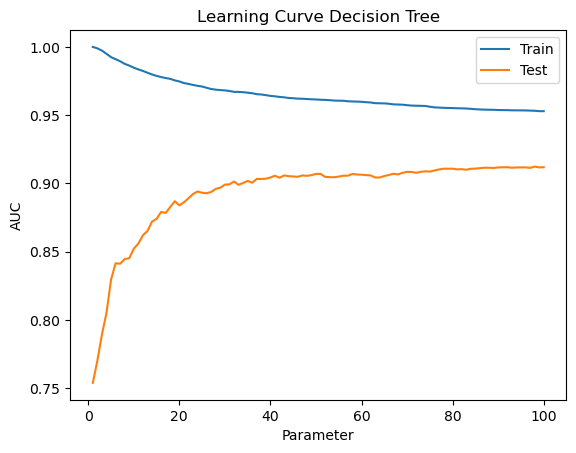

In [68]:
param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

#### Feature Importance

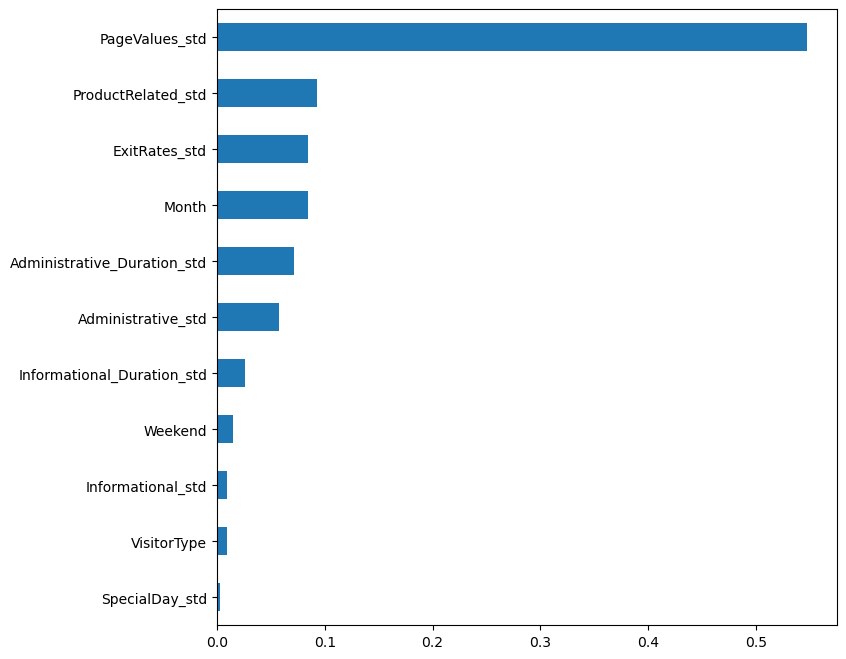

In [71]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(8,8))
ax.invert_yaxis()
plt.show()

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)
eval_classification(rf)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.54
Recall (Test Set): 0.70
F1-Score (Test Set): 0.61
AUC (test-proba): 0.90
AUC (train-proba): 1.00
roc_auc (crossval train): 0.9998158478211158
roc_auc (crossval test): 0.8836976576779094


#### Tuning Hyperparameter

In [73]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 5, 10)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 5, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators,
                       criterion=criterion,
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf
                      )

rf = RandomForestClassifier(random_state=42)
rf_tuning = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=50, cv=5)
rf_tuning.fit(X_train_SMOTE, y_train_SMOTE)
eval_classification(rf_tuning)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.54
Recall (Test Set): 0.76
F1-Score (Test Set): 0.63
AUC (test-proba): 0.89
AUC (train-proba): 0.92
roc_auc (crossval train): 0.8883995659310955
roc_auc (crossval test): 0.8723087115991245


#### Analyzing Learning Curve

param value: 2; train: 0.9894795076264303; test: 0.8180486141081148
param value: 2; train: 0.9893731997941382; test: 0.8184066593810473
param value: 3; train: 0.9968033488294846; test: 0.8364903384332669
param value: 4; train: 0.9985657763183431; test: 0.8601387284041708
param value: 5; train: 0.9991915669551859; test: 0.8625367181300553


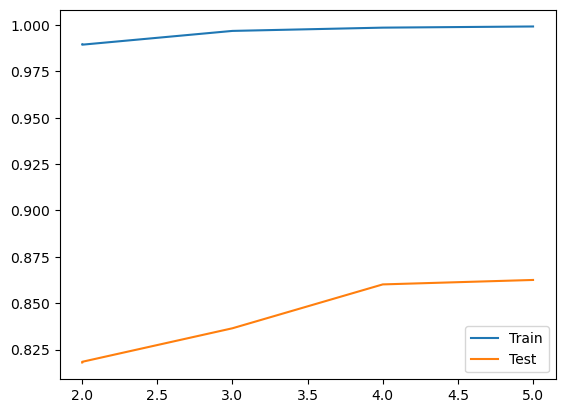

In [74]:
# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
param_values = [int(x) for x in np.linspace(2, 5, 5)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_SMOTE)
    train_auc = roc_auc_score(y_train_SMOTE, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Feature Importance

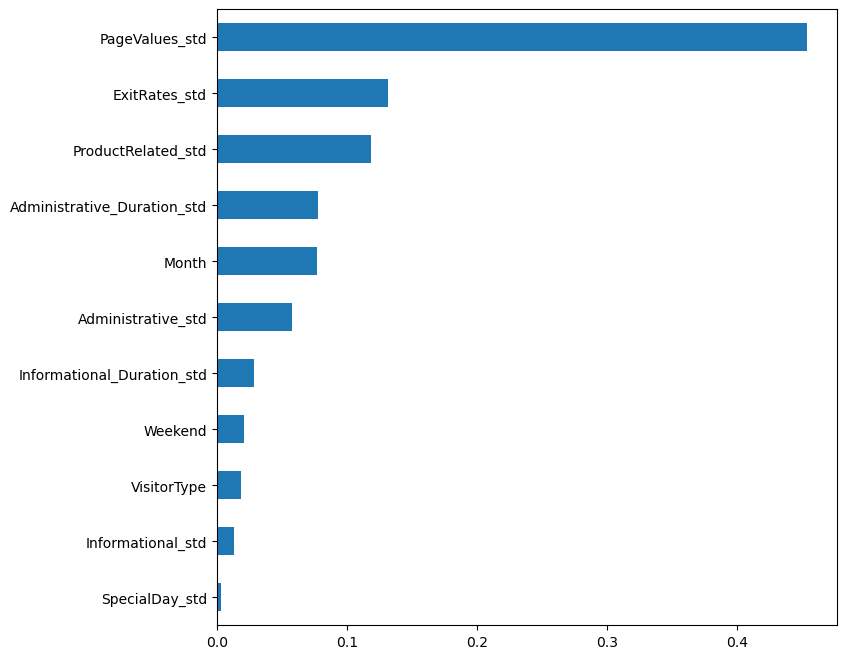

In [77]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(8,8))
ax.invert_yaxis()
plt.show()

### Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X_train_SMOTE,y_train_SMOTE)
eval_classification(ab)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.52
Recall (Test Set): 0.77
F1-Score (Test Set): 0.62
AUC (test-proba): 0.90
AUC (train-proba): 0.95
roc_auc (crossval train): 0.9198175010586634
roc_auc (crossval test): 0.879536383006722


#### Tuning Hyperparameter

In [79]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab = AdaBoostClassifier(random_state=42)
ab_tuning = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuning.fit(X_train_SMOTE,y_train_SMOTE)
eval_classification(ab_tuning)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.54
Recall (Test Set): 0.76
F1-Score (Test Set): 0.63
AUC (test-proba): 0.89
AUC (train-proba): 0.90
roc_auc (crossval train): 0.8822161933702592
roc_auc (crossval test): 0.8495527805443416


### Explain Shap Values

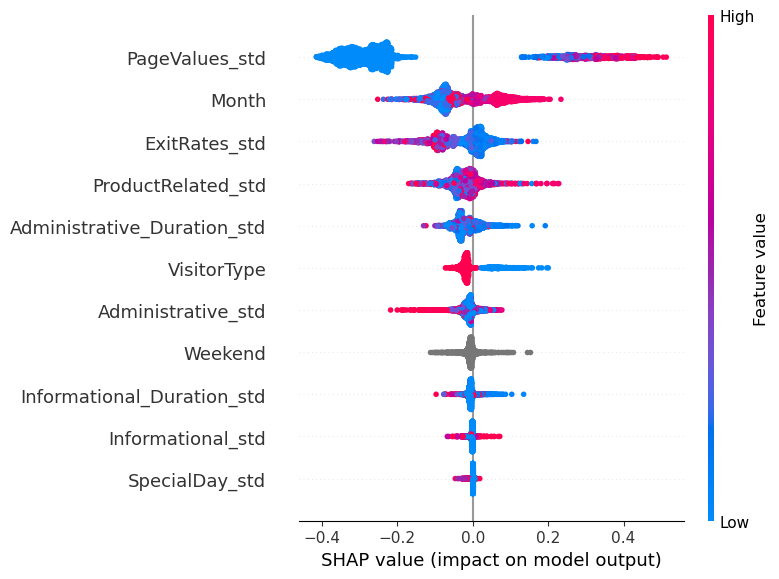

In [85]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)